**EXP-1**

In [3]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

documents = [
'Deep learning is amazing',
'Natural language processing is a part of AI',
'Neural networks learn from data',
'Word embeddings help machines understand text'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)
padded_sequences = pad_sequences(sequences, padding='post')
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8,
input_length=padded_sequences.shape[1]))
embedding_output = model.predict(padded_sequences)
print("Embedding output shape:", embedding_output.shape)
print("\nSample Embedding Vector for first word in first sentence:\n",
embedding_output[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Embedding output shape: (4, 8, 8)

Sample Embedding Vector for first word in first sentence:
 [ 0.02256216  0.03889266  0.0230404  -0.03223138 -0.0020448   0.00857229
 -0.00771711  0.04361038]


**EXP-2**

In [6]:
#!pip install tensorflow scikit-learn numpy
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,n_informative=2,n_redundant=0,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = keras.Sequential([
keras.layers.Dense(8, activation='relu', input_shape=(2,)),
                            keras.layers.Dense(4, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Training the model...")
model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, verbose=1)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print("\nPredictions:")
predictions = model.predict(X_test_scaled[:5])
predicted_classes = (predictions > 0.5).astype(int).flatten()
print("Actual labels :", y_test[:5])
print("Predicted labels:", predicted_classes)

Training the model...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5007 - loss: 0.7558
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5102 - loss: 0.6762
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5826 - loss: 0.6005
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7332 - loss: 0.5263
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.4914
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9020 - loss: 0.4464
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9236 - loss: 0.4092
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.3430
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.2999
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9570 - loss: 0.2286
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9426 - loss: 0.2157  

Test Accuracy: 93.50%

Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Actual labels : [0 0 1

**EXP-3**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9097 - loss: 0.3005 - val_accuracy: 0.9838 - val_loss: 0.0495
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9845 - loss: 0.0513 - val_accuracy: 0.9875 - val_loss: 0.0366
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0.0327 - val_accuracy: 0.9870 - val_loss: 0.0385
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9925 - loss: 0.0222 - val_accuracy: 0.9871 - val_loss: 0.0425
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9900 - val_loss: 0.0290
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0371

Test Accuracy: 99.00%


**EXP-4**

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3513 - val_loss: 0.1629
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1536 - val_loss: 0.1275
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1237 - val_loss: 0.1096
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1077 - val_loss: 0.0982
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0973 - val_loss: 0.0906
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0904 - val_loss: 0.0854
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0853 - val_loss: 0.0817
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0820 - val_loss: 0.0792
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0795 - val_loss: 0.0774
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0779 - val_loss: 0.0763
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


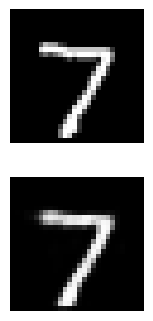

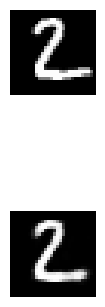

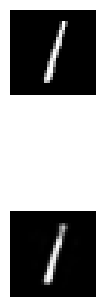

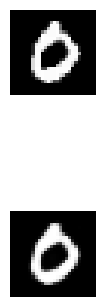

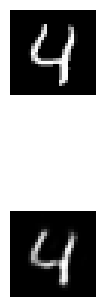

In [3]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))
input_img = tf.keras.Input(shape=(784,))
encoded = layers.Dense(64, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True,
validation_data=(x_test, x_test))
decoded_imgs = autoencoder.predict(x_test)
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
  plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.show()

**EXP-5**

In [4]:
import numpy as np
n_states = 6
actions = [0, 1]
q_table = np.zeros((n_states, len(actions)))
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 100
def choose_action(state):
    if np.random.uniform() < epsilon:
        return np.random.choice(actions)
    else:
        return np.argmax(q_table[state])
def get_env_feedback(state, action):
    if action == 1:
        if state == n_states - 2:
            return n_states - 1, 1
        else:
            return state + 1, 0
    else:
        return max(0, state - 1), 0
for episode in range(episodes):
    state = 0
    while state != n_states - 1:
        action = choose_action(state)
        next_state, reward = get_env_feedback(state, action)
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
        state = next_state
print("Trained Q-table:")
print(q_table)

Trained Q-table:
[[0.1530068  0.64316027]
 [0.1266197  0.7241288 ]
 [0.08556872 0.80866546]
 [0.23142271 0.89979807]
 [0.32631023 0.99997344]
 [0.         0.        ]]


**EXP-6**

In [6]:
#!pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
text = "hello world"
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}
seq_length = 3
X, y = [], []
for i in range(len(text) - seq_length):
  X.append([char_to_idx[ch] for ch in text[i:i + seq_length]])
  y.append(char_to_idx[text[i + seq_length]])
X = tf.keras.utils.to_categorical(X, num_classes=len(chars))
y = tf.keras.utils.to_categorical(y, num_classes=len(chars))
model = Sequential()
model.add(LSTM(16, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, verbose=0)
seed = "hel"
x_pred = np.array([[char_to_idx[ch] for ch in seed]])
x_pred = tf.keras.utils.to_categorical(x_pred, num_classes=len(chars))
pred = model.predict(x_pred, verbose=0)
print("Predicted character:", idx_to_char[np.argmax(pred)])

Predicted character: l


**EXP-7**

In [ ]:
# !pip install tensorflow numpy matplotlib pillow
# you need to load an image example.jpg in colab.
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
image_path = 'example.jpg'
model_vgg = VGG16()
model_vgg = Model(inputs=model_vgg.inputs, outputs=model_vgg.layers[-2].output)
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
image_features = model_vgg.predict(image)
vocab_size = 5000
max_length = 34
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')
print("Model built successfully.")